In [10]:
import pandas as pd
import numpy as np

In [11]:
df = pd.read_csv(r"C:\Users\madas\Downloads\movie_data\movies.csv")
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [12]:
df1 = pd.read_csv(r"C:\Users\madas\Downloads\movie_data\ratings.csv")
df1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [14]:
df1["userId"].nunique()

610

In [17]:
data = df.merge(df1,on ="movieId")

In [18]:
data

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


### Which movie has recieved maximum number of user ratings?


In [45]:
ratings_sum = data.groupby("title")["rating"].agg("count")
max_rated_movie = ratings_sum.idxmax()
max_rated_movie

'Forrest Gump (1994)'

In [47]:
data1 = pd.read_csv(r"C:\Users\madas\Downloads\movie_data\tags.csv")
data1

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [57]:
Df = data.merge(data1,on ="movieId")
Df

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [62]:
dftag = Df[Df["title"]=="Matrix, The (1999)"]

In [64]:
dftag["tag"].unique()

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [66]:
dfrat = Df[Df["title"]=="Terminator 2: Judgment Day (1991)"]
dfrat

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
93035,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5,3.0,847435258,424,apocalypse,1457844854
93036,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5,3.0,847435258,424,Arnold Schwarzenegger,1457844841
93037,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5,3.0,847435258,424,nuclear war,1457844861
93038,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5,3.0,847435258,424,sci-fi,1457844847
93039,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,5,3.0,847435258,424,Suspense,1457844864
...,...,...,...,...,...,...,...,...,...
94822,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,610,5.0,1479542983,424,sci-fi,1457844847
94823,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,610,5.0,1479542983,424,Suspense,1457844864
94824,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,610,5.0,1479542983,424,time travel,1457844843
94825,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,610,5.0,1479542983,474,robots,1137206517


In [70]:
ratings_sum = dfrat.groupby("title")["rating"].agg("mean").reset_index()
ratings_sum


,title,rating
0,Terminator 2: Judgment Day (1991),3.970982


### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

<Axes: ylabel='Density'>

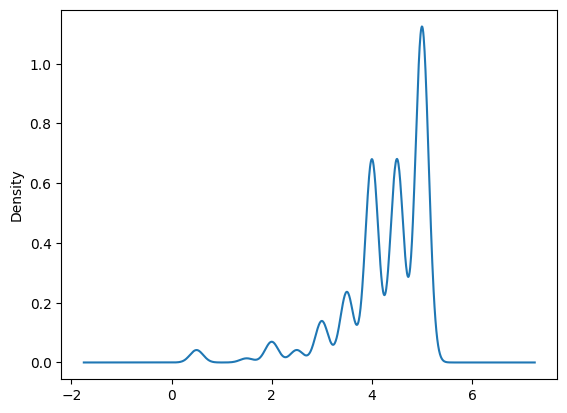

In [201]:
dis = Df[Df["title"]=="Fight Club (1999)"]["rating"].plot(kind = "density")
dis

In [102]:
dis.rating.unique()

array([5. , 2. , 0.5, 2.5, 3.5, 4.5, 4. , 3. , 1.5])

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='rating', ylabel='Count'>

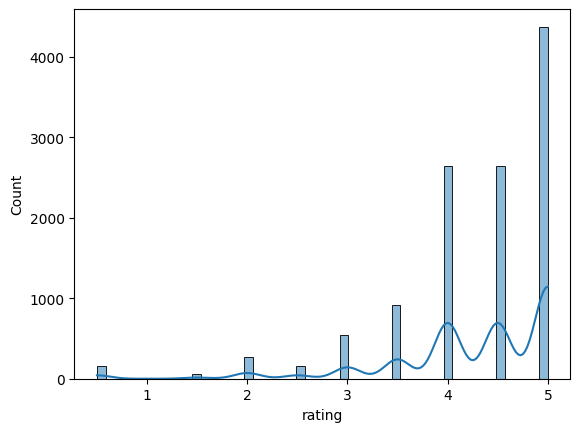

In [109]:
sns.histplot(data = dis,x = "rating",kde=True)

## 🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.




In [119]:
dfgroup = data.groupby("movieId")["rating"].agg(["mean","count"]).reset_index()\
.rename(columns = {"mean":"rating_mean","count":"rating_count"})

In [120]:
dfgroup

,movieId,rating_mean,rating_count
0,1,3.920930,215
1,2,3.431818,110
2,3,3.259615,52
3,4,2.357143,7
4,5,3.071429,49
...,...,...,...
9719,193581,4.000000,1
9720,193583,3.500000,1
9721,193585,3.500000,1
9722,193587,3.500000,1


In [121]:
df_inner = df.merge(dfgroup,on = "movieId",how = "inner")
df_inner

,movieId,title,genres,rating_mean,rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1
9721,193585,Flint (2017),Drama,3.500000,1
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,1


In [124]:
df_filter = df_inner[df_inner.rating_count > 50]
df_filter

,movieId,title,genres,rating_mean,rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52
5,6,Heat (1995),Action|Crime|Thriller,3.946078,102
6,7,Sabrina (1995),Comedy|Romance,3.185185,54
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,3.916667,54
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,3.778846,52
8358,109487,Interstellar (2014),Sci-Fi|IMAX,3.993151,73
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,4.050847,59


### Which movie is the most popular based on  average user ratings?


In [150]:
df_filter.groupby("title")["rating_mean"].mean().idxmax()

'Shawshank Redemption, The (1994)'

### Select all the correct options which comes under top 5 popular movies based on number of user ratings

In [202]:
df_filter.groupby("title")["rating_count"].mean().nlargest(5).reset_index()

,title,rating_count
0,Forrest Gump (1994),329.0
1,"Shawshank Redemption, The (1994)",317.0
2,Pulp Fiction (1994),307.0
3,"Silence of the Lambs, The (1991)",279.0
4,"Matrix, The (1999)",278.0


### Which Sci-Fi movie is "third most popular" based on the number of user ratings?


In [161]:
df_sci = df_filter[df_filter["genres"].str.contains("Sci-Fi")]
df_sci

,movieId,title,genres,rating_mean,rating_count
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,3.983051,177
133,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,2.877193,57
144,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,2.679245,53
145,173,Judge Dredd (1995),Action|Crime|Sci-Fi,2.669355,62
176,208,Waterworld (1995),Action|Adventure|Sci-Fi,2.913043,115
...,...,...,...,...,...
7675,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,3.869565,69
7749,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,3.435185,54
8358,109487,Interstellar (2014),Sci-Fi|IMAX,3.993151,73
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,4.050847,59


In [203]:
df_sci.groupby("title")["rating_count"].max().nlargest(3).reset_index()

,title,rating_count
0,"Matrix, The (1999)",278
1,Star Wars: Episode IV - A New Hope (1977),251
2,Jurassic Park (1993),238


### 🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

In [194]:
links = pd.read_csv(r"C:\Users\madas\Downloads\movie_data\links.csv")
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [210]:
# We thought of giving you a gift this new year by sharing the web scraping script
# Understanding the script before using is always appreciated
# We left few blanks in the script for your exploration
# Make sure to replace FILL_IN_THE_BLANK in the code to make it work

import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : "sc-bde20123-2 cdQqzc"})
    return imdb_rating.text if imdb_rating else np.nan

In [ ]:
imdb_ratings = []
for i in list(links["imdbId"]):
    imdb_ratings.append(scrapper(i))

In [218]:
final_df

,Unnamed: 0,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRatings
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...,...
431,431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


### Mention the movieId of the movie which has the highest IMDB rating.


In [256]:
final_df

,Unnamed: 0,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRatings
0,0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.6
3,3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...,...
431,431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


In [249]:
max_rating_index = final_df['imdbRatings'].idxmax()
movie_id_with_highest_rating = final_df.loc[max_rating_index, 'movieId']
movie_id_with_highest_rating

318

In [233]:
final_df['imdbRatings'].idxmax()

53

In [245]:
final_df["imdbRatings"].max()

9.3

In [244]:
final_df[final_df["imdbRatings"]==9.3]

,Unnamed: 0,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRatings
53,53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3


### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [251]:
Sci_df = final_df[final_df["genres"].str.contains("Sci-Fi")]
Sci_df

,Unnamed: 0,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRatings
12,12,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051,114746,63.0,8.0
30,30,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0,5.3
35,35,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0,5.6
36,36,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,113492,9482.0,5.6
38,38,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043,114898,9804.0,6.3
...,...,...,...,...,...,...,...,...,...
427,427,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565,848228,24428.0,8.0
428,428,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185,1392170,70160.0,7.2
433,433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


In [252]:
max_rating_index = Sci_df['imdbRatings'].idxmax()
movie_id_with_highest_rating = Sci_df.loc[max_rating_index, 'movieId']
movie_id_with_highest_rating

79132

In [253]:
Sci_df["imdbRatings"].max()

8.8

In [254]:
Sci_df[Sci_df["imdbRatings"]==8.8]

,Unnamed: 0,movieId,title,genres,count,mean,imdbId,tmdbId,imdbRatings
424,424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,27205.0,8.8
